In [ ]:
'''The following program opens a bunch of .csv files that are all in a folder
right now it opens one csv test file and finds the average temperature in degrees C 
from depths <=50 m for each year and returns a dictionary with years as keys and average 
temperatures as values'''

'''Things to do next:
1. Open all the csv files for a particular place one at a time
2. Plot the data of average temp vs. year with a line or scatter plot for each location
3. Make code into functions/better style'''

In [21]:
import csv
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import os
from sklearn.metrics import r2_score

%matplotlib inline

# Opens the regional data .csv files from the designated folders and creates a list of the data.
def read_in_regional_data(folder):
    regional_data_list = []
    directory = os.path.join("DataSets", folder)
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        with open(os.path.join(directory, file), encoding='utf-8') as csvfile:
            csv_reader = csv.reader(csvfile) 
            for row in csv_reader:
                regional_data_list.append(row)
    return regional_data_list
regional_data_list = read_in_regional_data("SWIndianOcean")

In [2]:
# Reads the list row by row and takes out any spaces in individual strings due to the large amount of extra spacing in
# the data files. Returns the data file as a list with no extra spacing.
def regional_data_list_no_spaces(regional_data_list):
    data_file_list_no_spaces = []
    for row in regional_data_list:    
        new_row = []
        for word in row:
            new_word = word.replace(" ", "")
            new_row.append(new_word)
        data_file_list_no_spaces.append(new_row)
    return data_file_list_no_spaces
data_file_list_no_spaces = regional_data_list_no_spaces(regional_data_list)

In [3]:
# Turns a list of lists into a new list of lists, where each inner list is a list of lists of all the data for
# each entry. Returns a list of lists for the data block.
def create_data_block_list_of_lists(data_file_list_no_spaces):
    data_block_list = []
    new_block = []
    for row in data_file_list_no_spaces:
        if "ENDOFVARIABLESSECTION" not in row:        
            new_block.append(row)        
        else:
            data_block_list.append(new_block)
            new_block = []
    return data_block_list
data_block_list = create_data_block_list_of_lists(data_file_list_no_spaces)

In [4]:
# Now make a list of dictionaries with the key of years, inner key of depths, and values of temperature
# Do the same for pH eventually
def create_year_and_temp_list(data_block_list):
    temperature_list = []
    for block in data_block_list:
        year_dict = {}
        depth_dict = {}
        for line in range(len(block)):       
            if 'Year' in block[line]:
                year = block[line][2]            
            if 'VARIABLES' and 'Temperatur' in block[line]:
                for i in range(line+3, len(block)):
                    depth = block[i][1]
                    temp = block[i][4]
                    if depth in depth_dict:
                        value = depth_dict[depth]
                        if value != None and temp != None: 
                            new_value = list(value).append(temp)
                            depth_dict[depth] = new_value
                    else:
                        depth_dict[depth] = temp
                year_dict[year] = depth_dict
            temperature_list.append(year_dict)
    return temperature_list
temperature_list = create_year_and_temp_list(data_block_list) 

In [5]:
# Have a list of dictionaries with outer keys of years, and inner keys of depths, and inner values of temps
# Now take all dicts that have the same year and create a new dictionary that has years as keys and as values, 
# averages all of the temps together (for all depths less than or equal to 50)
def create_year_and_temp_dict(temperature_list):
    temp_dict = {}
    for row in temperature_list:
        year = list(row.keys())
        depth = list(row[year[0]].keys())
        temp = row[year[0]][depth[0]]
        if int(float(depth[0])) <= 50:
            if year[0] in temp_dict:
                temp_list = temp_dict[year[0]]
                temp_list.append(temp)
            else:
                temp_dict[year[0]] = [temp]
    return temp_dict
temp_dict = create_year_and_temp_dict(temperature_list)    

In [8]:
# Now average together all the temperature values for each year key
def create_year_and_avg_temp_dict(temp_dict):
    avg_temp_dict = {}
    for year in temp_dict:
        temps = temp_dict[year]
        total_number_temps = len(temps)
        total_temp = 0
        for temp in temps:
            if temp != None:
                total_temp += int(float(temp))
        avg_temp = total_temp/total_number_temps
        avg_temp_dict[year] = avg_temp
    return avg_temp_dict
avg_temp_dict = create_year_and_avg_temp_dict(temp_dict)

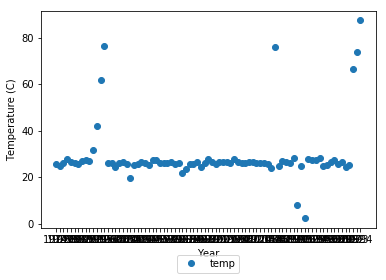

In [20]:
def create_lineplot_of_temp_data(avg_temp_dict):
    year_list = []
    index_list = []
    for year in avg_temp_dict:
        year_list.append(year)
        index_list.append(avg_temp_dict[year])            
    plt.plot(year_list, index_list, 'o', label = 'temp')
    plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
    plt.ylabel('Temperature (C)')
    plt.xlabel('Year')

create_lineplot_of_temp_data(avg_temp_dict)    
plt.show()  

In [40]:
def calc_r_squared_value(data_dict):
    total_data_list = []
    avg_data_list = []

    # Data_dict is the equivalent of temp_dict in other code
    # Likewise data is the equivalent of temp, etc. 
    # Also this works for pH as well as temp since the ave_temp_calc is general
    for year in data_dict:
        # This print statement is only here just to show that it is actually still
        # working and has not crashed. 
        print(year)
        data = data_dict[year]
        total_num_data = len(data)
        avg_num_dict = create_year_and_avg_temp_dict(data_dict)
        avg_num = avg_num_dict[year]
        avg_list = [avg_num]*total_num_data
        for i in range(len(data)):
            if data[i] != None:
                total_data_list.append(float(data[i]))
        for i in range(len(avg_list)):
            if data[i] != None:
                avg_data_list.append(avg_list[i])
    
    # The idea with the next bit of this code is to take that list of the average
    # numbers i had made and make it one huge list of the overall average number 
    # for the list as a whole. This should work as our "ideal" line.
    
    total_in_avg_data_list = 0
    for num in avg_data_list:
        total_in_avg_data_list += num
    
    total_avg_num = total_in_avg_data_list/len(avg_data_list)
    
    ideal_line_list = [total_avg_num]*len(avg_data_list)
    
    # This r2_score function is one that is within the sklearn.metrics library for
    # Python that I access from 
    # https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/metrics/regression.py#L448
    
    r2_final_score = r2_score(total_data_list, ideal_line_list)
    
    print(r2_final_score)
    return r2_final_score

calc_r_squared_value(temp_dict)

1974
1975
1978
1979
1980
1981
1982
1985
1986
1987
1990
1991
1995
1996
1997
1998
2001
2002
2003
2004
2006
2008
2009
2010
2016
1944
1945
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1976
1977
1983
1984
1988
1989
2011
2012
2013
2014
2015
2017
2018
1800
1847
1858
1875
1893
1899
1900
1905
1906
1913
1929
1934
1935
1949
1950
1951
1952
1999
2000
2005
2007
1992
1993
1994
-0.0012362875920777228


-0.0012362875920777228

In [ ]:

def main():
    read_in_regional_data("SWIndianOcean")
    regional_data_list_no_spaces(regional_data_list)
    create_data_block_list_of_lists(data_file_list_no_spaces)
    create_year_and_temp_list(data_block_list)
    create_year_and_temp_dict(temperature_list)
    create_year_and_avg_temp_dict(temp_dict)
    create_lineplot_of_temp_data(avg_temp_dict)

#     read_in_regional_data("CarribeanSea")
#     regional_data_list_no_spaces(regional_data_list)
#     create_data_block_list_of_lists(data_file_list_no_spaces)
#     create_year_and_temp_list(data_block_list)
#     create_year_and_temp_dict(temperature_list)
#     create_year_and_avg_temp_dict(temp_dict)
#     create_lineplot_of_temp_data(avg_temp_dict)
    
#     read_in_regional_data("Australia")
#     regional_data_list_no_spaces(regional_data_list)
#     create_data_block_list_of_lists(data_file_list_no_spaces)
#     create_year_and_temp_list(data_block_list)
#     create_year_and_temp_dict(temperature_list)
#     create_year_and_avg_temp_dict(temp_dict)
#     create_lineplot_of_temp_data(avg_temp_dict)

main()